In [ ]:
import pandas as pd
import numpy as np
import os
import pickle
import matplotlib.pyplot as plt
import sklearn
from sklearn import __version__ as sklearn_version
from sklearn.decomposition import PCA
from sklearn.preprocessing import scale, StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split, cross_validate, GridSearchCV, learning_curve
from sklearn.dummy import DummyRegressor
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, StackingRegressor, GradientBoostingRegressor
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn.pipeline import make_pipeline
from sklearn.impute import SimpleImputer
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.ensemble import BaggingRegressor
from sklearn.metrics import r2_score
from sklearn.ensemble import GradientBoostingRegressor
import pickle
energy = pd.read_csv('energy_processed.csv')

In [ ]:
pip install scikit-optimize

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 107.8/107.8 kB 904.5 kB/s eta 0:00:00


In [ ]:
from skopt import BayesSearchCV
from skopt.space import Real, Integer, Categorical

In [ ]:
energy

,electricity_access_%,clean_fuels_access_%,renewable_energy_share_final,electricity_fossil_fuels_output,electricity_nuclear_output,electricity_renewables_output,electricity_low_carbon,energy_consumption_per_capita,energy_usage_per_gdp,co2_emissions_per_capita,...,electricity_renewables_consumption_ratio,co2_emissions_consumption_ratio,land_area_with_electricity_access,land_area_with_clean_fuels_access,land_area_category,density_category,quadrant,country,year,gdp_per_capita
0,0.211158,0.339137,-1.023181,-0.271219,-0.287447,-0.345974,-1.127643,-0.837257,-0.288450,-0.246136,...,-0.343428,-0.163452,0.544158,0.627004,2,0,1,Algeria,2000,1765.027146
1,0.210378,0.348912,-1.023181,-0.269097,-0.287447,-0.345848,-1.125334,-0.832142,-0.317675,-0.247356,...,-0.343162,-0.168877,0.544094,0.629245,2,0,1,Algeria,2001,1740.606654
2,0.208649,0.373351,-1.018321,-0.267241,-0.287447,-0.345911,-1.126938,-0.826941,-0.304391,-0.244089,...,-0.343321,-0.165485,0.543951,0.634847,2,0,1,Algeria,2002,1781.828908
3,0.206264,0.383126,-1.020751,-0.264211,-0.287447,-0.344643,-1.103820,-0.819091,-0.315018,-0.239045,...,-0.340680,-0.160422,0.543755,0.637088,2,0,1,Algeria,2003,2103.381291
4,0.203519,0.392901,-1.022573,-0.261181,-0.287447,-0.344706,-1.106597,-0.813181,-0.346900,-0.237912,...,-0.340890,-0.161668,0.543529,0.639329,2,0,1,Algeria,2004,2610.185422
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1486,0.339709,-0.242492,-0.951495,-0.224039,-0.287447,-0.300327,-0.709669,-0.679652,0.678634,-0.224199,...,-0.282090,-0.193946,-0.282260,-0.281607,1,1,1,Uzbekistan,2016,2704.677188
1487,0.339709,-0.257155,-0.942990,-0.222221,-0.287447,-0.293353,-0.662571,-0.673272,0.694575,-0.220452,...,-0.273827,-0.191305,-0.282260,-0.282239,1,1,1,Uzbekistan,2017,1916.764642
1488,0.339709,-0.286481,-0.958785,-0.214891,-0.287447,-0.309203,-0.811492,-0.677955,1.005424,-0.217891,...,-0.294291,-0.186908,-0.282260,-0.283502,1,1,1,Uzbekistan,2018,1597.068337
1489,0.339709,-0.271818,-0.953925,-0.214778,-0.287447,-0.305272,-0.781299,-0.683508,0.824760,-0.214197,...,-0.288213,-0.180763,-0.282260,-0.282870,1,1,1,Uzbekistan,2019,1784.009816


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(energy.drop(columns=['gdp_per_capita', 'country', 'year']),
                                                    energy.gdp_per_capita, test_size=0.3,
                                                    random_state=47)

Let's start with a basic linear regression model.

In [ ]:
pipe = make_pipeline(SelectKBest(score_func=f_regression), StandardScaler(), LinearRegression())

In [ ]:
pipe.fit(X_train, y_train)

Pipeline(steps=[('selectkbest',
                 SelectKBest(score_func=<function f_regression at 0x7d15177af250>)),
                ('standardscaler', StandardScaler()),
                ('linearregression', LinearRegression())])

In [ ]:
y_tr_pred = pipe.predict(X_train)
y_te_pred = pipe.predict(X_test)

In [ ]:
k = [k+1 for k in range(len(X_train.columns))]
grid_params = {'selectkbest__k': k}

In [ ]:
lr_grid_cv = GridSearchCV(pipe, param_grid=grid_params, cv=5, n_jobs=-1)

In [ ]:
lr_grid_cv.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('selectkbest',
                                        SelectKBest(score_func=<function f_regression at 0x7d15177af250>)),
                                       ('standardscaler', StandardScaler()),
                                       ('linearregression',
                                        LinearRegression())]),
             n_jobs=-1,
             param_grid={'selectkbest__k': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11,
                                            12, 13, 14, 15, 16, 17, 18, 19, 20,
                                            21, 22, 23, 24]})

In [ ]:
score_mean = lr_grid_cv.cv_results_['mean_test_score']
score_std = lr_grid_cv.cv_results_['std_test_score']
cv_k = [k for k in lr_grid_cv.cv_results_['param_selectkbest__k']]

In [ ]:
lr_grid_cv.best_params_

{'selectkbest__k': 24}

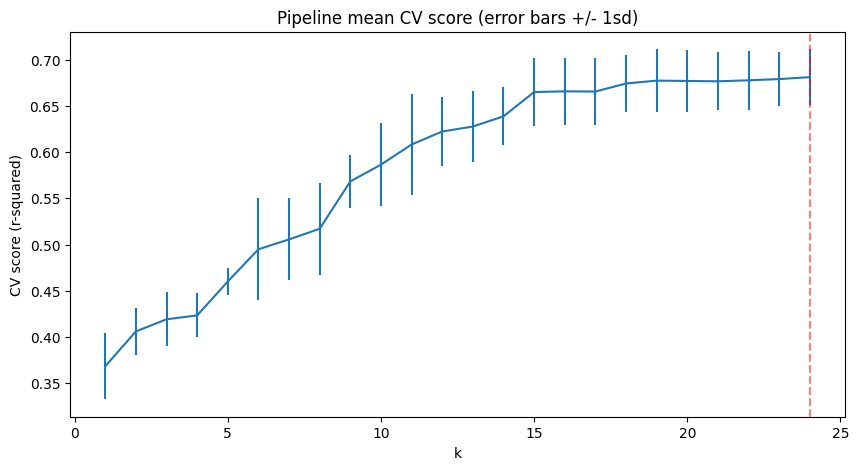

In [ ]:
best_k = lr_grid_cv.best_params_['selectkbest__k']
plt.subplots(figsize=(10, 5))
plt.errorbar(cv_k, score_mean, yerr=score_std)
plt.axvline(x=best_k, c='r', ls='--', alpha=.5)
plt.xlabel('k')
plt.ylabel('CV score (r-squared)')
plt.title('Pipeline mean CV score (error bars +/- 1sd)');

In [ ]:
selected = lr_grid_cv.best_estimator_.named_steps.selectkbest.get_support()

In [ ]:
coefs = lr_grid_cv.best_estimator_.named_steps.linearregression.coef_
features = X_train.columns[lr_grid_cv.best_estimator_.named_steps.selectkbest.get_support()]
pd.Series(coefs, index=features).sort_values(ascending=False)

,0
land_area_with_electricity_access,21903.816819
electricity_fossil_fuels_output,17482.547975
energy_consumption_per_capita,10608.278732
renewable_energy_share_primary,7838.315485
electricity_fossil_fuels_consumption_ratio,6990.132609
clean_fuels_access_%,6578.941460
density_category,5573.026477
lat,4550.778616
quadrant,3555.758986
electricity_nuclear_output,2471.485949


Strongest coefs: <br>
land_area_with_electricity_access and electricity_fossil_fuels_output	(+) <br>
land_area_with_clean_fuels_access and co2_emissions_per_capita (-)

In [ ]:
lr_neg_mae = cross_validate(lr_grid_cv.best_estimator_, X_train, y_train,
                            scoring='neg_mean_absolute_error', cv=5, n_jobs=-1)

In [ ]:
lr_mae_mean = np.mean(-1 * lr_neg_mae['test_score'])
lr_mae_std = np.std(-1 * lr_neg_mae['test_score'])
lr_mae_mean, lr_mae_std

(8532.781593815358, 666.8452615444498)

In [ ]:
mean_absolute_error(y_test, lr_grid_cv.best_estimator_.predict(X_test))

9039.41470703813

Now let's try a random forest pipeline.

In [ ]:
RF_pipe = make_pipeline(
    SimpleImputer(strategy='median'),
    StandardScaler(),
    RandomForestRegressor(random_state=47)
)

rf_default_cv_results = cross_validate(RF_pipe, X_train, y_train, cv=5)
rf_cv_scores = rf_default_cv_results['test_score']

n_est = [int(n) for n in np.logspace(start=1, stop=3, num=20)]
grid_params = {
    'randomforestregressor__n_estimators': n_est,
    'standardscaler': [StandardScaler(), None],
    'simpleimputer__strategy': ['mean', 'median']
}

rf_grid_cv = GridSearchCV(RF_pipe, param_grid=grid_params, cv=5, n_jobs=-1)
rf_grid_cv.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('simpleimputer',
                                        SimpleImputer(strategy='median')),
                                       ('standardscaler', StandardScaler()),
                                       ('randomforestregressor',
                                        RandomForestRegressor(random_state=47))]),
             n_jobs=-1,
             param_grid={'randomforestregressor__n_estimators': [10, 12, 16, 20,
                                                                 26, 33, 42, 54,
                                                                 69, 88, 112,
                                                                 143, 183, 233,
                                                                 297, 379, 483,
                                                                 615, 784,
                                                                 1000],
                         'simpleimputer__strategy': ['mean', 'median'],
                         'standardscaler': [StandardScaler(), None]})

In [ ]:
rf_grid_cv.best_params_

{'randomforestregressor__n_estimators': 33,
 'simpleimputer__strategy': 'mean',
 'standardscaler': None}

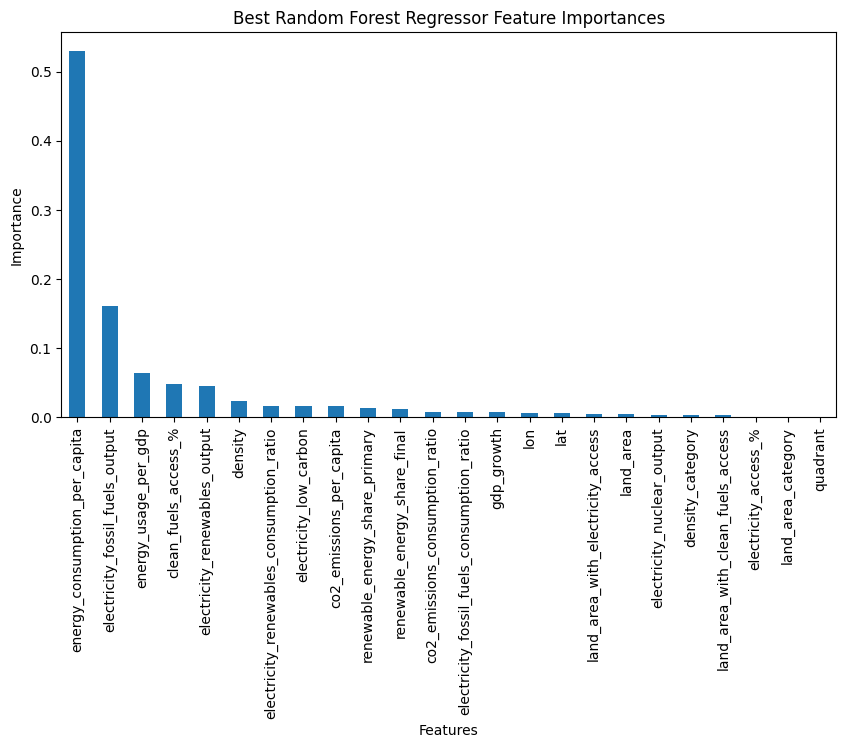

In [ ]:
plt.subplots(figsize=(10, 5))
imps = rf_grid_cv.best_estimator_.named_steps.randomforestregressor.feature_importances_
rf_feat_imps = pd.Series(imps, index=X_train.columns)
rf_feat_imps = rf_feat_imps.sort_values(ascending=False)
rf_feat_imps.plot(kind='bar')
plt.xlabel('Features')
plt.ylabel('Importance')
plt.title('Best Random Forest Regressor Feature Importances')
plt.show()

Within RF, we see energy_consumption_per_capita as the strongest, and electricity_fossil_fuels_output shows up again as well.

In [ ]:
mean_absolute_error(y_test, lr_grid_cv.best_estimator_.predict(X_test))

9039.41470703813

In [ ]:
mean_squared_error(y_test, lr_grid_cv.best_estimator_.predict(X_test))

187465950.30501944

In [ ]:
r2_score(y_test, lr_grid_cv.best_estimator_.predict(X_test))

0.6757557080981518

In [ ]:
mean_absolute_error(y_test, rf_grid_cv.best_estimator_.predict(X_test))

3172.01549201781

In [ ]:
mean_squared_error(y_test, rf_grid_cv.best_estimator_.predict(X_test))

35868585.062049665

In [ ]:
r2_score(y_test, rf_grid_cv.best_estimator_.predict(X_test))

0.9379610860209951

Random forest shows significantly lower MAE, MSE, and a higher R2 score than LR.

In [ ]:
RF_pipe = make_pipeline(
    SimpleImputer(strategy='median'),
    StandardScaler(),
    RandomForestRegressor(random_state=47)
)
rf_default_cv_results = cross_validate(RF_pipe, X_train, y_train, cv=5)
rf_cv_scores = rf_default_cv_results['test_score']
search_space = {
    'randomforestregressor__n_estimators': Integer(10, 200),
    'randomforestregressor__max_features': Real(0.1, 1.0, 'uniform'),
    'randomforestregressor__max_depth': Integer(1, 20),
    'randomforestregressor__min_samples_split': Integer(2, 20),
    'randomforestregressor__min_samples_leaf': Integer(1, 20),
    'standardscaler': Categorical([StandardScaler(), None]),
    'simpleimputer__strategy': Categorical(['mean', 'median'])
}

opt = BayesSearchCV(
    estimator=RF_pipe,
    search_spaces=search_space,
    n_iter=50,
    cv=5,
    n_jobs=-1,
    scoring='r2',
    random_state=47
)

opt.fit(X_train, y_train)

print("Best Parameters:", opt.best_params_)
print("Best Score:", opt.best_score_)

Best Parameters: OrderedDict([('randomforestregressor__max_depth', 14), ('randomforestregressor__max_features', 0.3621342162124933), ('randomforestregressor__min_samples_leaf', 1), ('randomforestregressor__min_samples_split', 2), ('randomforestregressor__n_estimators', 114), ('simpleimputer__strategy', 'median'), ('standardscaler', StandardScaler())])
Best Score: 0.9464321055453709


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(energy.drop(columns=['gdp_per_capita', 'country', 'year']),
                                                    energy.gdp_per_capita, test_size=0.3,
                                                    random_state=47)
optimized_RF_pipe = make_pipeline(
    SimpleImputer(strategy='median'),
    StandardScaler(),
    RandomForestRegressor(
        n_estimators=114,
        max_depth=14,
        max_features=0.362,
        min_samples_leaf=1,
        min_samples_split=2,
        random_state=47
    )
)

optimized_RF_pipe.fit(X_train, y_train)

y_pred = optimized_RF_pipe.predict(X_test)

r2 = r2_score(y_test, y_pred)
print("R² Score on Test Set:", r2)

R² Score on Test Set: 0.9581309862748802


Bayesian optimization gives an improved r2 of 0.95.

In [ ]:
y_train_pred = optimized_RF_pipe.predict(X_train)
r2_train = r2_score(y_train, y_train_pred)
print("R² Score on Training Set:", r2_train)

y_test_pred = optimized_RF_pipe.predict(X_test)
r2_test = r2_score(y_test, y_test_pred)
print("R² Score on Test Set:", r2_test)

difference = r2_train - r2_test
print("Difference between Training and Test R² Scores:", difference)

R² Score on Training Set: 0.9932722508602264
R² Score on Test Set: 0.9581309862748802
Difference between Training and Test R² Scores: 0.035141264585346166


Difference in r2 < 0.05 so not overfitting.

Complete model with either bagging, boosting, or stacking.

In [ ]:

bagging_regressor = BaggingRegressor(
    base_estimator=RandomForestRegressor(
        n_estimators=114,
        max_depth=14,
        max_features=0.362,
        min_samples_leaf=1,
        min_samples_split=2,
        random_state=47
    ),
    n_estimators=10,
    random_state=47,
    n_jobs=-1
)

bagging_regressor.fit(X_train, y_train)

y_pred_bagging = bagging_regressor.predict(X_test)

r2_bagging = r2_score(y_test, y_pred_bagging)
print("R² Score on Test Set with Bagging:", r2_bagging)

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


R² Score on Test Set with Bagging: 0.9417015605847948


In [ ]:
boosting_regressor = GradientBoostingRegressor(
    n_estimators=100,
    learning_rate=0.1,
    max_depth=3,
    random_state=47
)

boosting_regressor.fit(X_train, y_train)

y_pred_boosting = boosting_regressor.predict(X_test)

r2_boosting = r2_score(y_test, y_pred_boosting)
print("R² Score on Test Set with Boosting:", r2_boosting)

R² Score on Test Set with Boosting: 0.928317357686419


In [ ]:
optimized_rf = make_pipeline(
    SimpleImputer(strategy='median'),
    StandardScaler(),
    RandomForestRegressor(
        n_estimators=114,
        max_depth=14,
        max_features=0.362,
        min_samples_leaf=1,
        min_samples_split=2,
        random_state=47
    )
)

gradient_boosting = GradientBoostingRegressor(random_state=47)

meta_model = RandomForestRegressor(n_estimators=50, random_state=47)

stacking_regressor = StackingRegressor(
    estimators=[
        ('optimized_rf', optimized_rf),
        ('gradient_boosting', gradient_boosting)
    ],
    final_estimator=meta_model,
    passthrough=True
)

stacking_regressor.fit(X_train, y_train)

y_pred_stack = stacking_regressor.predict(X_test)

r2_stack = r2_score(y_test, y_pred_stack)
mse_stack = mean_squared_error(y_test, y_pred_stack)
mae_stack = mean_absolute_error(y_test, y_pred_stack)
print("R² Score on Test Set with Stacking (Random Forest Meta-Model):", r2_stack)
print("Mean Squared Error on Test Set with Stacking (Random Forest Meta-Model):", mse_stack)
print("Mean Absolute Error on Test Set with Stacking (Random Forest Meta-Model):", mae_stack)

R² Score on Test Set with Stacking (Random Forest Meta-Model): 0.9658850438195037
Mean Squared Error on Test Set with Stacking (Random Forest Meta-Model): 19723994.653780323
Mean Absolute Error on Test Set with Stacking (Random Forest Meta-Model): 2600.374585687441


Stacking gives the best r2 score.

In [ ]:
y_train_pred_stack = stacking_regressor.predict(X_train)
r2_train_stack = r2_score(y_train, y_train_pred_stack)
print("R² Score on Training Set with Stacking (Random Forest Meta-Model):", r2_train_stack)

print("R² Score on Test Set with Stacking (Random Forest Meta-Model):", r2_stack)

difference_stack = r2_train_stack - r2_stack
print("Difference between Training and Test R² Scores with Stacking:", difference_stack)

R² Score on Training Set with Stacking (Random Forest Meta-Model): 0.9902721110834853
R² Score on Test Set with Stacking (Random Forest Meta-Model): 0.9658850438195037
Difference between Training and Test R² Scores with Stacking: 0.024387067263981654


Difference between train and test r2 < 0.05.

In [ ]:
with open('gdp_per_capita_predictor', 'wb') as file:
    pickle.dump(stacking_regressor, file)